# Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load Data

In [2]:
data = pd.read_csv("data/data_cleaned.csv")

# Data Preparation

In [3]:
# one hot
data = pd.get_dummies(data, prefix = ["HEAT", "AC", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"], columns = ["HEAT", "AC", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"])
# split
x_data = data.drop(["PRICE"], axis=1)
y_data = data["PRICE"]
# normalization
x_data = x_data.astype(float)
x_data = x_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# train & test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

# Random Forest Regressor

In [4]:
model = RandomForestRegressor(n_estimators=400, n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8262403426859302

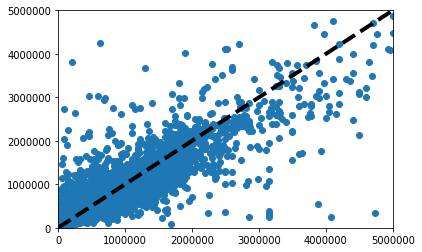

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
plt.xlim(0, 5e6)
plt.ylim(0, 5e6)
# line = mlines.Line2D([0, 1], [0, 1], color='red')
# transform = ax.transAxes
# line.set_transform(transform)
# ax.add_line(line)
ax.plot([0, y_test.max()], [0, y_test.max()], 'k--', lw=4)
plt.show()  

# KerasRegressor

In [6]:
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [7]:
KerasRegressor()

AttributeError: 'KerasRegressor' object has no attribute '__call__'